# Pneumonia Detector using Keras

## Problem: Detect Pneumonia in Lung's X-Ray

## Overview

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/New_Pneumonia_cartoon.jpg/290px-New_Pneumonia_cartoon.jpg)


In [19]:
# importing libs
import seaborn as sns
import tqdm
from tqdm import tqdm
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import *
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# listing files in folder
val_files = os.listdir('val/')
id = []
result = []

In [5]:
# flaging the binary classifier in images
for i in range(0,len(val_files),1):
    a = val_files[i].replace('.jpeg','')
    id.append(a)
    if a.find('NORMAL'):
        result.append(1)
    else:
        result.append(0)

In [6]:
# image files in train folder
normal_xray = len(os.listdir('train/NORMAL'))
sick_xray = len(os.listdir('train/PNEUMONIA'))
number_train = normal_xray + sick_xray

In [7]:
# image files in test folder
normal_xray_test = len(os.listdir('test/NORMAL'))
sick_xray_test = len(os.listdir('test/PNEUMONIA'))
number_test = normal_xray_test + sick_xray_test

In [8]:
# building CNN with Keras
clf = Sequential()
clf.add(Conv2D(64, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
clf.add(BatchNormalization())
clf.add(MaxPooling2D(pool_size = (2,2)))

clf.add(Conv2D(64, (3,3), input_shape = (64, 64, 3), activation = 'sigmoid'))
clf.add(BatchNormalization())
clf.add(MaxPooling2D(pool_size = (2,2)))

clf.add(Conv2D(64, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
clf.add(BatchNormalization())
clf.add(MaxPooling2D(pool_size = (2,2)))

clf.add(Flatten())

clf.add(Dense(units = 128, activation = 'relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units = 128, activation = 'relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units = 128, activation = 'relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units = 128, activation = 'relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units = 128, activation = 'relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units = 128, activation = 'relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units = 128, activation = 'relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units = 128, activation = 'relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units = 128, activation = 'relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units = 128, activation = 'relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units = 128, activation = 'relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units = 1, activation = 'sigmoid'))

clf.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

In [9]:
generator_train = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2,
                                         fill_mode='nearest')

generator_test = ImageDataGenerator(rescale = 1./255)

base_train = generator_train.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

base_test = generator_test.flow_from_directory('test',
                                               target_size = (64, 64),
                                               batch_size = 32,
                                               class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [26]:
model = clf.fit_generator(base_train, steps_per_epoch = number_train/32,
                            epochs = 10, validation_data = base_test,
                            validation_steps = number_test, callbacks=False)

Epoch 1/10
163/163 [==============================] - 109s 666ms/step - loss: 0.0815 - accuracy: 0.9712 - val_loss: 0.2951 - val_accuracy: 0.9022
Epoch 2/10
163/163 [==============================] - 100s 611ms/step - loss: 0.0781 - accuracy: 0.9728
Epoch 3/10
163/163 [==============================] - 100s 611ms/step - loss: 0.0749 - accuracy: 0.9735
Epoch 4/10
163/163 [==============================] - 99s 610ms/step - loss: 0.0863 - accuracy: 0.9672
Epoch 5/10
163/163 [==============================] - 101s 619ms/step - loss: 0.1646 - accuracy: 0.9597
Epoch 6/10
163/163 [==============================] - 101s 616ms/step - loss: 0.0894 - accuracy: 0.9709
Epoch 7/10
163/163 [==============================] - 100s 616ms/step - loss: 0.0975 - accuracy: 0.9659
Epoch 8/10
163/163 [==============================] - 98s 603ms/step - loss: 0.0851 - accuracy: 0.9689
Epoch 9/10
163/163 [==============================] - 99s 608ms/step - loss: 0.0851 - accuracy: 0.9735
Epoch 10/10
163/163 [====

In [27]:
# showing the cnn structure
print(clf.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

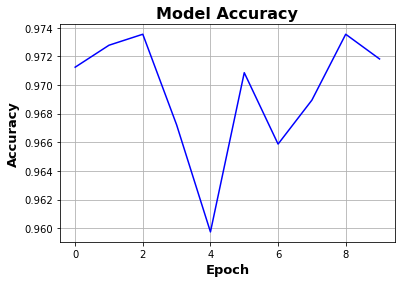

In [34]:
# summarize history for accuracy
plt.plot(model.history['accuracy'] , color='blue')
plt.title('Model Accuracy' , size =16 , weight = 'bold')
plt.ylabel('Accuracy' , size = 13 , weight = 'bold')
plt.xlabel('Epoch' , size =13 , weight = 'bold')
plt.grid()
plt.show()

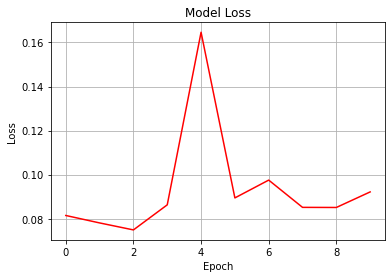

In [35]:
# summarize history for loss
plt.plot(model.history['loss'] , color='red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

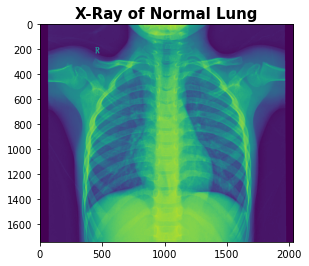

In [20]:
# normal xray example
img = mpimg.imread('val/'+val_files[0])
imgplot = plt.imshow(img)
plt.title('X-Ray of Normal Lung' , size = 15 , weight = 'bold')
plt.show()

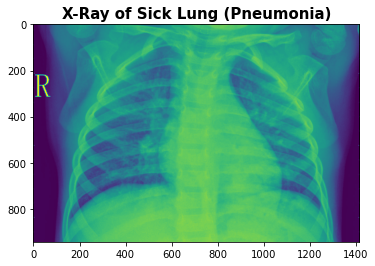

In [17]:
# sick xray example
img = mpimg.imread('val/'+val_files[11])
imgplot = plt.imshow(img)
plt.title('X-Ray of Sick Lung (Pneumonia)' , size = 15 , weight = 'bold')
plt.show()

In [30]:
# predict validation images using the model (CNN)
final_predict = []

tqdm.pandas()
for i in tqdm(range(0, len(val_files), 1)):
    img_test = image.load_img('val/'+val_files[i] ,
                                  target_size = (64,64))
    img_test = image.img_to_array(img_test)
    img_test /= 255
    img_test = np.expand_dims(img_test, axis = 0)
    previsao = clf.predict(img_test)
    final_predict.append(previsao[0][0])

100%|██████████| 16/16 [00:00<00:00, 16.27it/s]


In [31]:
# creating Dataframe with images id and the predict
df = pd.DataFrame({'id':id , 'label':result , 'predict':final_predict})
df['predict'] = df['predict'].apply(lambda x: 1 if x > 0.5 else 0)

In [23]:
# showing the indices of classifier
print(base_train.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [32]:
acc = accuracy_score(df['label'] ,df['predict']) 
print('CNN Accuracy: ',acc*100, '%')

CNN Accuracy:  93.75 %


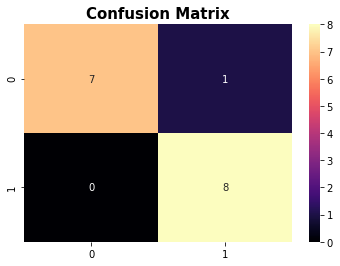

In [33]:
# confusion matrix
cm = confusion_matrix(df['label'] ,df['predict'] )
sns.heatmap(cm, annot=True , cmap ='magma')
plt.title('Confusion Matrix' , size = 15 , weight = 'bold')
plt.show()